## Major chunk of code inspired by John McKay (@mckayjohns)

In [ ]:
pip install soccerplots

In [1]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
df = pd.read_csv('manager nos como - Sheet2.csv') #read the file, this is tabulated by me via FBRef. You can take any data

In [3]:
df.head(15)

,Teams,Goals per 90,xG per 90,Shots per 90,Goals per Shot,Middle Third Touches per 90,Touches in Opp. Box per 90,PPDA,High turnovers per game,Through balls conceded per 90,Passes allowed in own box per 90,Shots Conceded per 90,Goals conceded per 90,xG Conceded per 90
0,Liverpool - 23/24,2.10,2.17,18.48,0.11,350.5,33.0,9.2,9.61,1.48,6.52,11.24,0.81,1.14
1,Bayer Leverkusen - 23/24,2.53,2.75,17.53,0.14,435.6,35.1,13.2,10.94,1.37,5.42,8.68,0.74,0.94
2,Sporting CP - 23/24,2.68,2.19,16.79,0.15,344.3,33.3,10.7,9.57,1.79,4.47,7.79,1.00,0.79
3,Brighton - 23/24,1.64,1.67,14.73,0.10,360.4,30.1,10.6,9.31,1.32,7.59,12.14,1.59,1.55


In [72]:
#filter with team for comparison later
dfls = df[(df['Teams'] == 'Bayer Leverkusen - 23/24') | (df['Teams'] == 'Sporting CP - 23/24')].reset_index()

In [73]:
dfls = dfls.drop(['index'], axis = 1) 

In [74]:
#change column names for better radar visualisation
new_column_names = {
    'Teams': 'Team',
    'Goals per 90': 'Goals',
    'xG per 90': 'xG',
    'Shots per 90': 'Sh/90',
    'Goals per Shot': 'Gls/Shot',
    'Middle Third Touches per 90': 'Middle third touches',
    'Touches in Opp. Box per 90': 'Opp. box touches',
    'PPDA': 'PPDA',
    'High turnovers per game': 'High turnovers',
    'Through balls conceded per 90': 'Through balls conc',
    'Passes allowed in own box per 90': 'Passes conc(own box)',
    'Shots Conceded per 90': 'Shots conceded',
    'Goals conceded per 90': 'Goals conceded',
    'xG Conceded per 90': 'xG conceded'
}

dfls = dfls.rename(columns=new_column_names)


In [75]:
dfls

,Team,Goals,xG,Sh/90,Gls/Shot,Middle third touches,Opp. box touches,PPDA,High turnovers,Through balls conc,Passes conc(own box),Shots conceded,Goals conceded,xG conceded
0,Bayer Leverkusen - 23/24,2.53,2.75,17.53,0.14,435.6,35.1,13.2,10.94,1.37,5.42,8.68,0.74,0.94
1,Sporting CP - 23/24,2.68,2.19,16.79,0.15,344.3,33.3,10.7,9.57,1.79,4.47,7.79,1.00,0.79


In [76]:
#get parameters

params = list(dfls.columns)
params = params[1:]
params

['Goals',
 'xG',
 'Sh/90',
 'Gls/Shot',
 'Middle third touches',
 'Opp. box touches',
 'PPDA',
 'High turnovers',
 'Through balls conc',
 'Passes conc(own box)',
 'Shots conceded',
 'Goals conceded',
 'xG conceded']

In [77]:
#create radar ranges 

ranges = []
a_values = []
b_values = []

#adding 20% up and down from value of each metric for making radar understand the high and low point
for x in params:
    a = min(dfls[params][x])
    a = a - (a*.20) 
    
    b = max(dfls[params][x])
    b = b +(b*.20)
    
    ranges.append((a,b))

for x in range (len(dfls['Team'])):
    if dfls['Team'][x] == 'Bayer Leverkusen - 23/24': 
        a_values = dfls.iloc[x].values.tolist()
    if dfls['Team'][x] == 'Sporting CP - 23/24':
        b_values = dfls.iloc[x].values.tolist()
    
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]

In [78]:
values

[[2.53,
  2.75,
  17.53,
  0.14,
  435.6,
  35.1,
  13.2,
  10.94,
  1.37,
  5.42,
  8.68,
  0.74,
  0.94],
 [2.68,
  2.19,
  16.79,
  0.15,
  344.3,
  33.3,
  10.7,
  9.57,
  1.79,
  4.47,
  7.79,
  1.0,
  0.79]]

In [79]:
#title 

title = dict(
    title_name = 'Bayer Leverkusen - 23/24',
    title_color = 'cyan',
    subtitle_name = 'Xabi Alonso',
    subtitle_color = 'cyan',
    
    title_name_2 = 'Sporting CP - 23/24',
    title_color_2 = 'green',
    subtitle_name_2 = 'Ruben Amorim',
    subtitle_color_2 = 'green',
    
    title_fontsize = 18,
    subtitle_fontsize = 14
 
)

endnote = 'All Numbers per 90\nVisual by - Mizgan, @mizgans \ndata via FBRef/Opta\n conc = conceded'

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

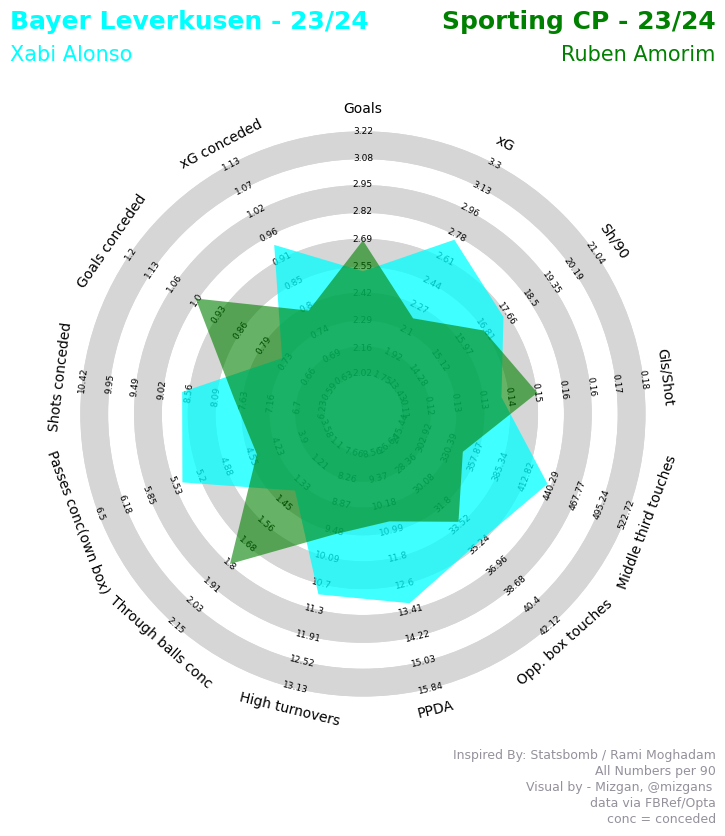

In [80]:
#plot radar
radar = Radar()

fig,ax = radar.plot_radar(ranges = ranges, params = params, values = values,
                          radar_color = ['cyan', 'green'], alphas = [0.75, 0.6], title = title, endnote = endnote,
                         compare = True)